In [1]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'1.0.0'

In [20]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
places = [{'city' : 'Merida',
         'state' : 'Yucatan',
         'country' : 'Mexico'},
         {'city' : 'Kanasin',
         'state' : 'Yucatan',
         'country' : 'Mexico'}]

## Drive road network

get drivable public streets (but not service roads)

In [21]:
# download and project a street network
G = ox.graph_from_place(places, network_type='drive')

In [22]:
G_proj = ox.project_graph(G)

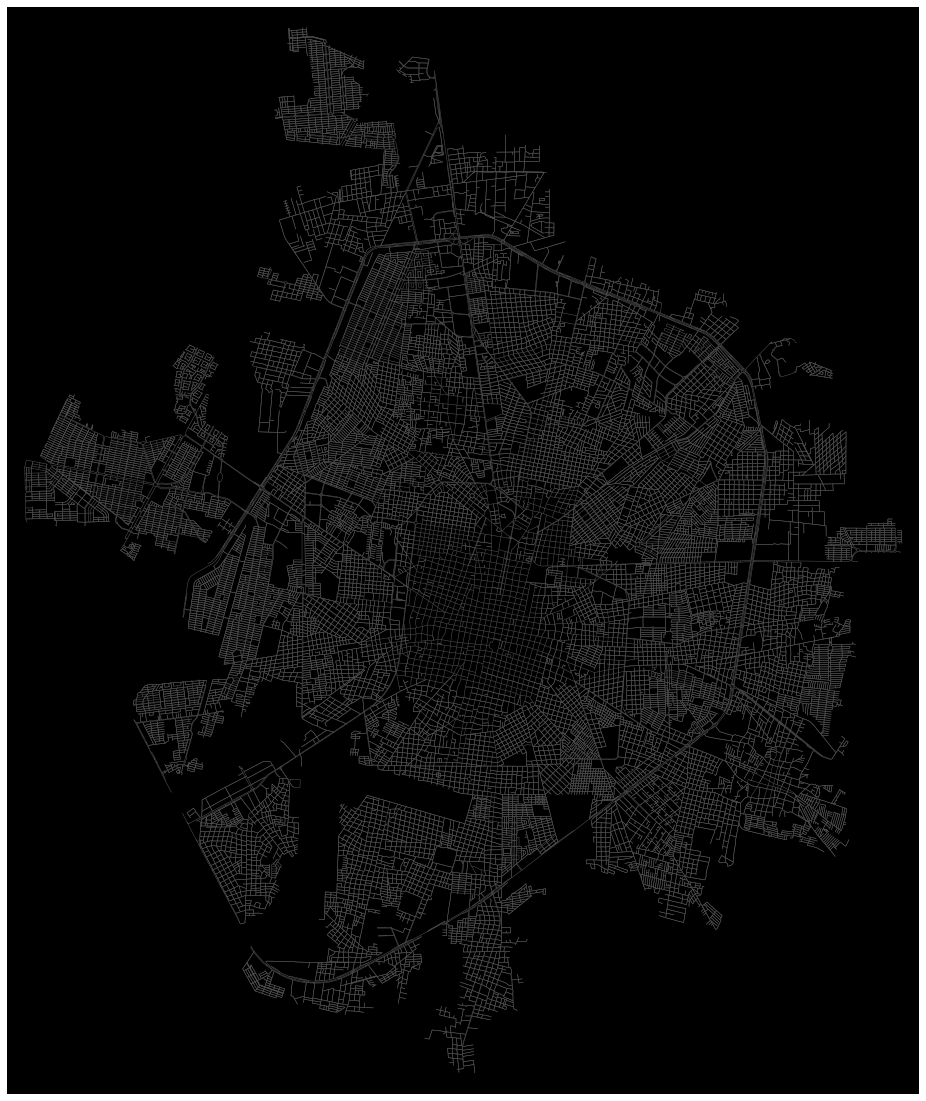

In [23]:
fig, ax = ox.plot_graph(G_proj, bgcolor='k', node_size=0, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=0.5, edge_alpha=1, figsize=(20,20))

In [24]:
# what sized area does our network cover in square meters?
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

326966364.4029937

In [25]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 29226,
 'm': 80109,
 'k_avg': 5.4820365428043525,
 'intersection_count': 26995,
 'streets_per_node_avg': 3.2012249367001986,
 'streets_per_node_counts': {0: 0,
  1: 2231,
  2: 69,
  3: 16661,
  4: 10126,
  5: 131,
  6: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.07633613905426676,
  2: 0.0023609115171422707,
  3: 0.5700745911174981,
  4: 0.34647231916786425,
  5: 0.004482310271675905,
  6: 0.000273728871552727},
 'edge_length_total': 7277435.043000081,
 'edge_length_avg': 90.84416286559663,
 'street_length_total': 4254469.158000012,
 'street_length_avg': 91.48018917582326,
 'street_segments_count': 46507,
 'node_density_km': 89.38534106822765,
 'intersection_density_km': 82.56200924303036,
 'edge_density_km': 22257.442462890376,
 'street_density_km': 13011.947469790131,
 'circuity_avg': 1.0204782604664033,
 'self_loop_proportion': 0.00034952377385811834,
 'clean_intersection_count': 21185,
 'clean_intersection_density_km': 64.79259736297827}

In [10]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filepath='networks/drive_road_network_shapefiles', directed=True)
ox.save_graphml(G, filepath='networks/drive_road_network.graphml', gephi=True)
ox.save_graph_geopackage(G, filepath='networks/drive_road_network.gpkg', directed=True)

## Drive service road network

get drivable public streets including service roads

In [26]:
# download and project a street network
G_service = ox.graph_from_place(places, network_type='drive_service')

In [27]:
G_service_proj = ox.project_graph(G_service)

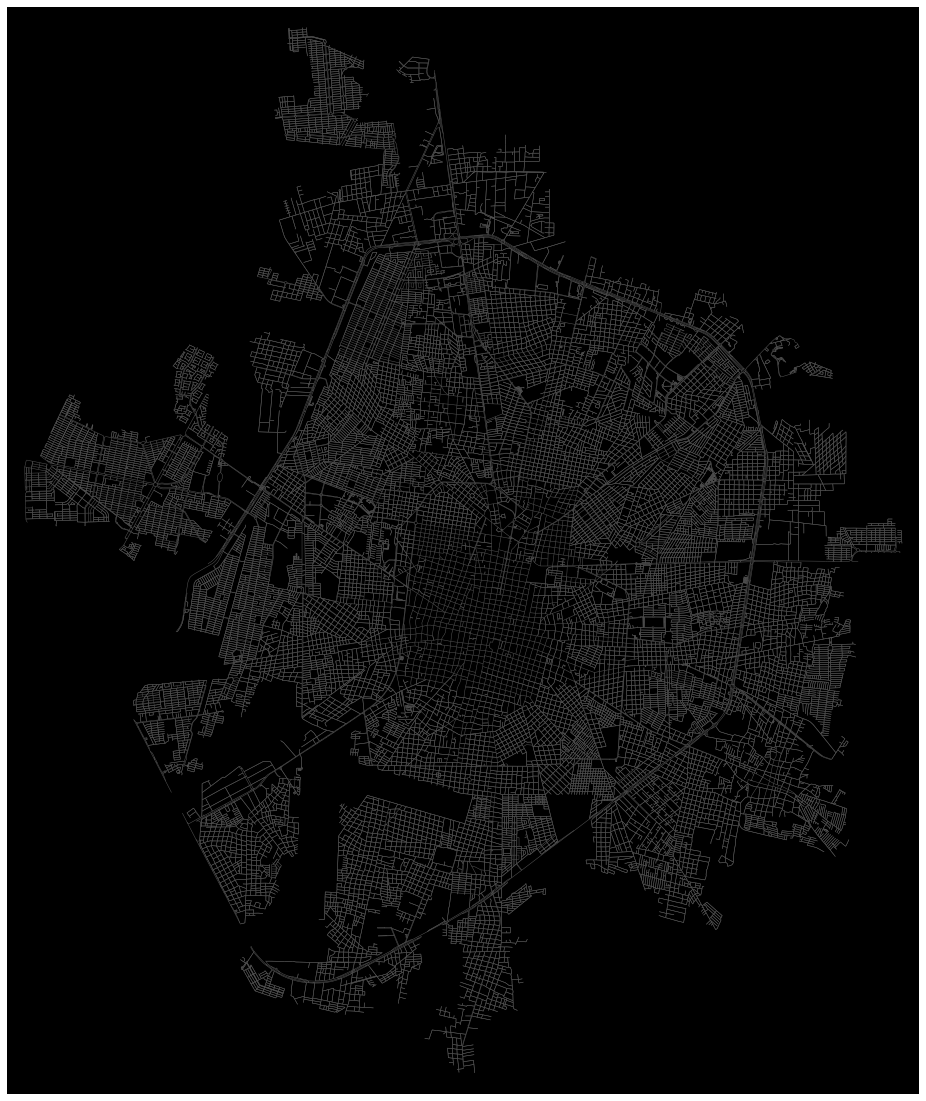

In [28]:
fig, ax = ox.plot_graph(G_service_proj, bgcolor='k', node_size=0, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=0.5, edge_alpha=1, figsize=(20,20))

In [29]:
# what sized area does our network cover in square meters?
nodes_proj = ox.graph_to_gdfs(G_service_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

327108682.88690686

In [30]:
# show some basic stats about the network
ox.basic_stats(G_service_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 30757,
 'm': 83587,
 'k_avg': 5.435315537926326,
 'intersection_count': 28265,
 'streets_per_node_avg': 3.180056572487564,
 'streets_per_node_counts': {0: 0,
  1: 2492,
  2: 85,
  3: 17725,
  4: 10311,
  5: 136,
  6: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.08102220632701498,
  2: 0.0027635985304158405,
  3: 0.5762915759014208,
  4: 0.33524075820138505,
  5: 0.004421757648665345,
  6: 0.00026010339109796144},
 'edge_length_total': 7448723.467000072,
 'edge_length_avg': 89.11342035244802,
 'street_length_total': 4346411.383000016,
 'street_length_avg': 89.37164853083331,
 'street_segments_count': 48633,
 'node_density_km': 94.02685287517663,
 'intersection_density_km': 86.40858980124419,
 'edge_density_km': 22771.402462512317,
 'street_density_km': 13287.361694714553,
 'circuity_avg': 1.0237791088050676,
 'self_loop_proportion': 0.0007656693026427554,
 'clean_intersection_count': 21653,
 'clean_intersection_density_km': 66.19512453445392}

In [14]:
ox.save_graph_shapefile(G_service, filepath='networks/drive_service_road_network_shapefiles', directed=True)
ox.save_graphml(G_service, filepath='networks/drive_service_road_network.graphml', gephi=True)
ox.save_graph_geopackage(G_service, filepath='networks/drive_service_road_network.gpkg', directed=True)

# Discussion

Between both networks, the one not including service roads covers an area of $326966364.4029937 m^2$ with 29226 nodes and 80109 edges; the network that includes service roads covers an area of $327108682.88690686 m^2$ with 30757 nodes and 83587 edges.